# 1. Visualização do dataset

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py

import src

Using TensorFlow backend.


## Informações do dataset

- Número de exemplos de treinamento e teste
- Shape dos exemplos do dataset
- Distribuições de frequência do conjunto de treinamento e teste

Training examples: 880
Test examples: 1769768
Example shape: (32, 32, 3)


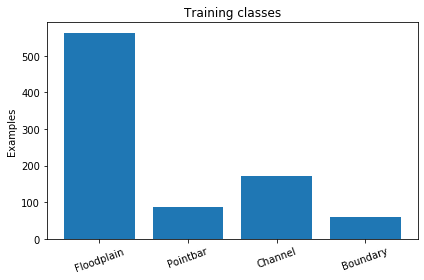

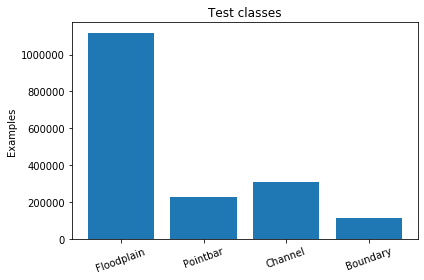

In [7]:
filename = '../data/interim/stanford6_32.h5'
with h5py.File(filename, 'r') as dataset:
    x_train_original = np.array(dataset['train/X'])
    y_train_original = np.array(dataset['train/Y'])
    x_test_original = np.array(dataset['test/X'])
    y_test_original = np.array(dataset['test/Y'])

classnames = {
    0: 'Floodplain',
    1: 'Pointbar',
    2: 'Channel',
    3: 'Boundary',
}    
    
m = x_train_original.shape[0]
num_classes = 4

train_freq = src.class_frequency(y_train_original, num_classes)
test_freq = src.class_frequency(y_test_original, num_classes)

print(f"Training examples: {y_train_original.shape[0]}")
print(f"Test examples: {y_test_original.shape[0]}")
print(f"Example shape: {x_train_original.shape[1:]}")

src.plot_classes_freq(train_freq, classnames.values(), title='Training classes')
src.plot_classes_freq(test_freq, classnames.values(), title='Test classes')

## Imagens de treinamento
Visualização de 10 imagens de treinamento aleatórias

In [ ]:
nrows, ncols = 2, 5
idx = np.random.choice(m, nrows * ncols)
fig = plt.figure(figsize=(12, 5))
for i in range(1, nrows * ncols +1):
    fig.add_subplot(nrows, ncols, i)
    plt.imshow(x_train_original[idx[i-1]])
    plt.title(f'class: {classnames[y_train_original[idx[i-1]][0]]}')
    plt.xticks([])
    plt.yticks([]) 

[**2. Data preparation**](02-data-preparation.ipynb)